In [1]:
import streamlit as st
# from compute2d import compute_2d_histogram
import numpy as np
import pandas as pd
import altair as at
from copy import copy
import plotly.graph_objects as go
# from paracoords import create_paracoords

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import pandas as pd
# preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit

# models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neural_network import MLPRegressor

#pipelines
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer

# import pickle5 as pickle
import itertools
from joblib import dump,load

In [7]:
def compute_2d_histogram(var1, var2, df, density=True):
    H, xedges, yedges = np.histogram2d(df[var1], df[var2], density=density)
    H[H == 0] = np.nan

    # Create a nice variable that shows the bin boundaries
    xedges = pd.Series(['{0:.4g}'.format(num) for num in xedges])
    xedges = pd.DataFrame({"a": xedges.shift(), "b": xedges}).dropna().agg(' - '.join, axis=1)
    yedges = pd.Series(['{0:.4g}'.format(num) for num in yedges])
    yedges = pd.DataFrame({"a": yedges.shift(), "b": yedges}).dropna().agg(' - '.join, axis=1)

    # Cast to long format using melt
    res = pd.DataFrame(H, 
                       index=yedges, 
                       columns=xedges).reset_index().melt(
                            id_vars='index'
                       ).rename(columns={'index': 'value2', 
                                         'value': 'correlation',
                                         'variable': 'value'})
    

    # Also add the raw left boundary of the bin as a column, will be used to sort the axis labels later
    res['raw_left_value'] = res['value'].str.split(' - ').map(lambda x: x[0]).astype(float)   
    res['raw_left_value2'] = res['value2'].str.split(' - ').map(lambda x: x[0]).astype(float) 
    res['variable'] = var1
    res['variable2'] = var2 
    return res.dropna() # Drop all combinations for which no values where found"

In [8]:
def create_paracoords(data):
    fig = go.Figure(data=
                go.Parcoords(
                    line = dict(color = data['quality']),dimensions = list([
                        dict(constraintrange = [7.5,9],
                             label = 'quality', values = data['quality']),
                        dict(label = 'alcohol', values = data['alcohol']),
                        dict(label = 'sulphates', values = data['sulphates']),
                        dict(label = 'pH', values = data['pH']),
                        dict(label = 'total sulfur dioxide', values = data['total sulfur dioxide']),
                        dict(label = 'density', values = data['density']),
                        dict(label = 'free sulfur dioxide', values = data['free sulfur dioxide']),
                        dict(label = 'chlorides', values = data['chlorides']),
                        dict(label = 'residual sugar', values = data['residual sugar']),
                        dict(label = 'citric acid', values = data['citric acid']),
                        dict(label = 'volatile acidity', values = data['volatile acidity']),
                        dict(label = 'fixed acidity', values = data['fixed acidity'])])))
    fig.update_layout(template='presentation')

    return fig


In [ ]:

#set configurations and title
st.set_page_config(page_title="Auto MPG Dataset Interactive Predictive Analytics Module",
    page_icon=":car:",
    layout='wide')

st.title('Auto MPG Dataset Interactive Predictive Analytics Module')
st.write("This interactive webapp allows you to explore and visualize how 3 differently trained machine learning models try to predict the mileage of a car, given various numerical attributes about it, including: cylinders, displacement, horsepower, weight, and acceleration. The models used in creating the second visualization can be interactively customized by changing their parameters in the first visualization.")

#load data
white = pd.read_csv('winequality-white.csv', sep=';')
red = pd.read_csv('winequality-red.csv', sep=';')

In [125]:
import streamlit as st
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

In [127]:
st.title('Auto MPG Dataset Interactive Predictive Analytics Module')


2021-04-07 07:02:12.310 WARNING root: 
  command:

    streamlit run ipykernel_launcher [ARGUMENTS]


In [128]:
@st.cache
def load_data():
    data = df
    return data


In [129]:
data_load_state = st.text('Loading data...')
auto_data = load_data()


InternalHashError: module '__main__' has no attribute '__file__'

While caching the body of `load_data()`, Streamlit encountered an
object of type `builtins.function`, which it does not know how to hash.

**In this specific case, it's very likely you found a Streamlit bug so please
[file a bug report here.]
(https://github.com/streamlit/streamlit/issues/new/choose)**

In the meantime, you can try bypassing this error by registering a custom
hash function via the `hash_funcs` keyword in @st.cache(). For example:

```
@st.cache(hash_funcs={builtins.function: my_hash_func})
def my_func(...):
    ...
```

If you don't know where the object of type `builtins.function` is coming
from, try looking at the hash chain below for an object that you do recognize,
then pass that to `hash_funcs` instead:

```
Object of type builtins.function: <function load_data at 0x0000027BE192A2F0>
```

Please see the `hash_funcs` [documentation]
(https://streamlit.io/docs/caching.html)
for more details.
            

In [3]:
auto_mpg = pd.read_csv('auto-mpg.data',sep="\t",header=None)
features = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin']
numeric_columns = ['cylinders','displacement','horsepower','weight','acceleration']
skip_columns = ['model_year','origin'] 
label = ['mpg']
split_data = [elem.split() for elem in auto_mpg[0]] 
for elem in split_data:
    for e in  elem:
        if e == '?':
            e = np.nan
df = pd.DataFrame([[0,0,0,0,0,0,0,0]],columns=features)
for elem in split_data:
    df = df.append(pd.DataFrame([[float(e) if e!='?' else np.nan for e in elem]],columns=features))

df = df.dropna()

X = df[numeric_columns]
y = df[label]



def get_candidate_models(x,y,params={  
            'hidden_layer_sizes':[(100,),(1000,),(100,50)],
            'activation': ['identity', 'logistic', 'relu', 'tanh'],
            # 'mlp__solver':'adam',
            'alpha':[0.1,0.01,0.001],
            #'learning_rate':['constant'],
            'learning_rate_init':[0.1,0.01],
            # 'mlp__power_t':0.5,  assert(solver=='sgd' and learning_rate=='inv_scaling)        
            'max_iter':[2000]       
        }):
    '''returns a dictionary of 3 fitted candidate models'''
    
    if params is None:
        return None

    

    regressors = {'Default MLP':Pipeline([('scaler', StandardScaler()), ('pca',PCA(n_components=1)), ('regressor', MLPRegressor())]).fit(x,y),
              'Tuned MLP': Pipeline([('scaler', StandardScaler()), ('pca',PCA(n_components=1)), ('regressor', GridSearchCV(MLPRegressor(),params))]).fit(x,y),
              'Linear Regressor': Pipeline([('scaler', StandardScaler()), ('pca',PCA(n_components=1)), ('regressor', LinearRegression())]).fit(x,y)
             }
    return regressors

def regression_plot(x,y,xlabel='X',ylabel='Y',logy=False,regressors=None):
    '''creates a scatter plot of all passed samples along with predictions of of all passed regressors'''

    fig, ax = plt.subplots()    
       
    if regressors is not None:
        for regressor in regressors.items():
            #regressor = regressor[1].fit(x.reshape(-1,1),y)
            x_std = regressor[1].named_steps['scaler'].transform(x)
            x_pca = regressor[1].named_steps['pca'].transform(x_std)
            max_x = np.max(x_pca)
            min_x = np.min(x_pca)
            ax.plot(np.arange(float(min_x),float(max_x),0.1), regressor[1].named_steps['regressor'].predict(np.array(np.arange(float(min_x),float(max_x),0.1)).reshape(-1,1)) ,label=regressor[0],linewidth=3)

    ax.plot(x_pca,y, linewidth=0, marker='v', label='Data points',color='m')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if logy:
        ax.set_yscale('log')
    ax.legend(facecolor='white')

    return fig
    

2021-04-07 10:44:09.077 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


In [5]:
data.shape,df.shape

((19, 8), (393, 8))

In [122]:
regressors = get_candidate_models(X.values,y.values.ravel())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



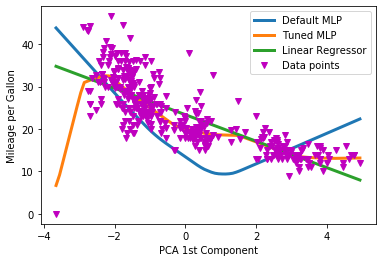

In [124]:
regression_plot(X.values,y.values,regressors=regressors,xlabel='PCA 1st Component',ylabel='Mileage per Gallon')